#**Domain - Data Science Intern**
##Phase 1 Project (Normal Task) - Exploratory Data Analysis- Terrorism

##Dataset - Kaggle [START-UMD/gtd]


# Install kaggle and download dataset

In [1]:
#install the kaggle
! pip install -q kaggle

In [3]:
# Create a kaggle folder and copy the kaggle.json to folder kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
# Permisson for the kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# To list all datasets
! kaggle datasets list

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023                     Global YouTube Statistics 2023                       60KB  2023-07-28 15:36:38           6173        210  1.0              
nelgiriyewithana/countries-of-the-world-2023                        Global Country Information Dataset 2023              23KB  2023-07-08 20:37:33          13600        545  1.0              
brunoalarcon123/top-200-spotify-songs-dataset                       Top 200 Spotify Songs Dataset                        35MB  2023-08-18 05:36:12           1792         60  1.0              
ishanshrivastava28/tata-online-retail-da

In [6]:
# Global Terrorism Database dataset download
! kaggle datasets download START-UMD/gtd

 59% 17.0M/28.7M [00:00<00:00, 87.9MB/s]
100% 28.7M/28.7M [00:00<00:00, 119MB/s] 


In [7]:
# unzip the downloaded dataset
! unzip gtd.zip

Archive:  gtd.zip
  inflating: globalterrorismdb_0718dist.csv  


#Importing Library and Dataset

In [8]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [9]:
#Dataset Path
GlobalTerror_data_path=("/content/globalterrorismdb_0718dist.csv")
#Import Data
ds=pd.read_csv(GlobalTerror_data_path, encoding = "ISO-8859-1")
print("Dataset imported successfully.")

<ipython-input-9-37d3aca26a7c>:4: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  ds=pd.read_csv(GlobalTerror_data_path, encoding = "ISO-8859-1")


Dataset imported successfully.


In [10]:
# Overview of dataset
ds.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [11]:
#shape of dataset
print('Number of rows and columns in dataset: ',ds.shape)

Number of rows and columns in dataset:  (181691, 135)


In [12]:
# All column name
ds.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

#Taking only important data columns

In [13]:
# renaming important columns
ds.rename(columns={'iyear':'Year','imonth':'Month','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','success':'Success','motive':'Motive',
                   'attacktype1_txt':'AttackType','weaptype1_txt':'WeaponType','targtype1_txt':'TargetType','gname':'Group','nkill':'Kill','nwound':'Wound'}, inplace=True)

In [14]:
ds = ds[['Year','Month','Country','Region','State','City','latitude','longitude','Success','Motive','AttackType','WeaponType','TargetType','Group','Kill','Wound']]

In [15]:
# Information about dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Country     181691 non-null  object 
 3   Region      181691 non-null  object 
 4   State       181270 non-null  object 
 5   City        181257 non-null  object 
 6   latitude    177135 non-null  float64
 7   longitude   177134 non-null  float64
 8   Success     181691 non-null  int64  
 9   Motive      50561 non-null   object 
 10  AttackType  181691 non-null  object 
 11  WeaponType  181691 non-null  object 
 12  TargetType  181691 non-null  object 
 13  Group       181691 non-null  object 
 14  Kill        171378 non-null  float64
 15  Wound       165380 non-null  float64
dtypes: float64(4), int64(3), object(9)
memory usage: 22.2+ MB


#DATA VISUALISATION


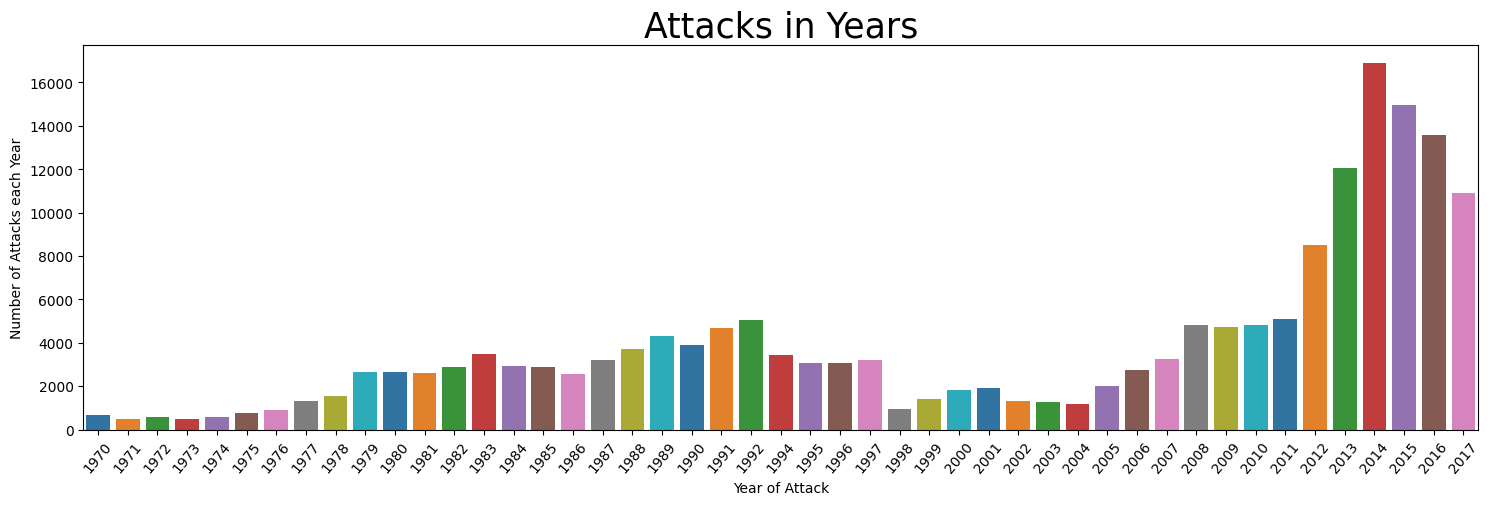

In [16]:
# Number of attacks each year

year = ds['Year'].unique()
years_count = ds['Year'].value_counts(dropna = False).sort_index() # drop the NaN values

plt.figure(figsize = (18,5))
sns.barplot(x = year, y = years_count, palette = "tab10")

plt.xticks(rotation = 50)
plt.xlabel('Year of Attack', fontsize=10)
plt.ylabel('Number of Attacks each Year', fontsize=10)
plt.title('Attacks in Years', fontsize=25)
plt.show()

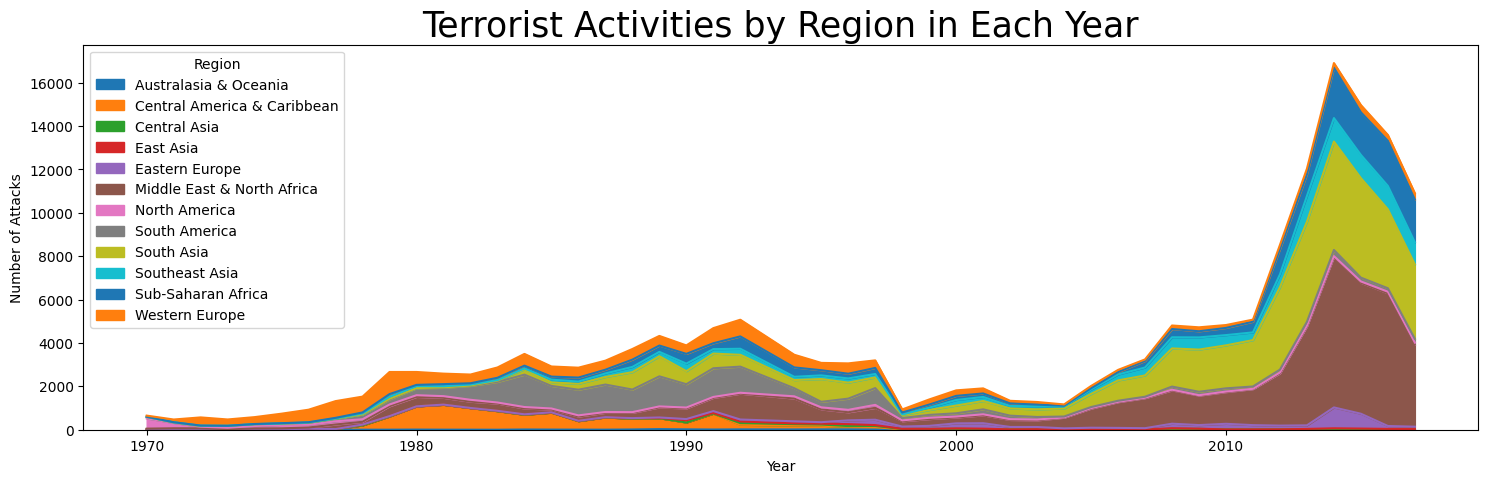

In [17]:
# Terrorist activities by region

pd.crosstab(ds.Year, ds.Region).plot(kind='area',figsize =(18,5))
plt.title('Terrorist Activities by Region in Each Year',fontsize=25)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

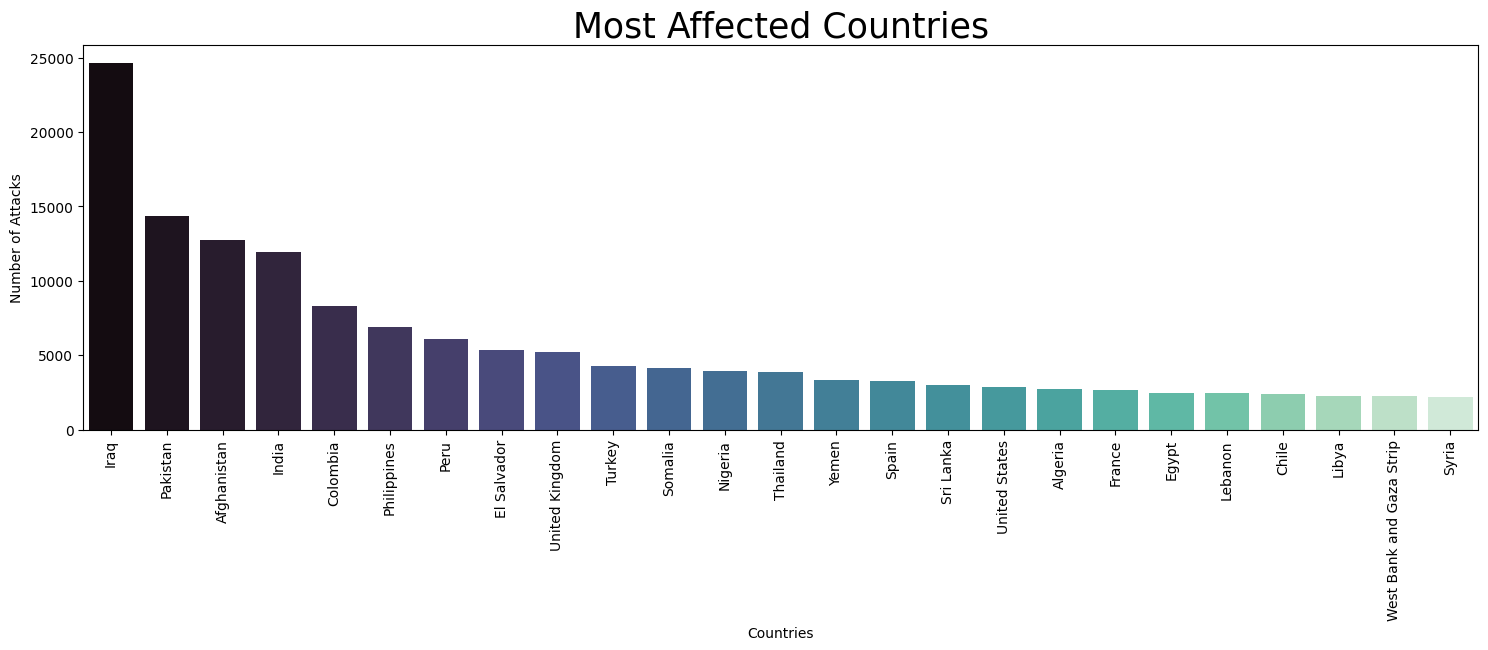

In [18]:
# Number of attacks in each country

country = ds['Country'].value_counts()[:25].index
To_attack = ds['Country'].value_counts()[:25].values

plt.figure(figsize = (18,5))
sns.barplot(x = country, y = To_attack, palette = 'mako')

plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Number of Attacks')
plt.title('Most Affected Countries', fontsize=25)
plt.show()

In [19]:
ds['Country'].value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

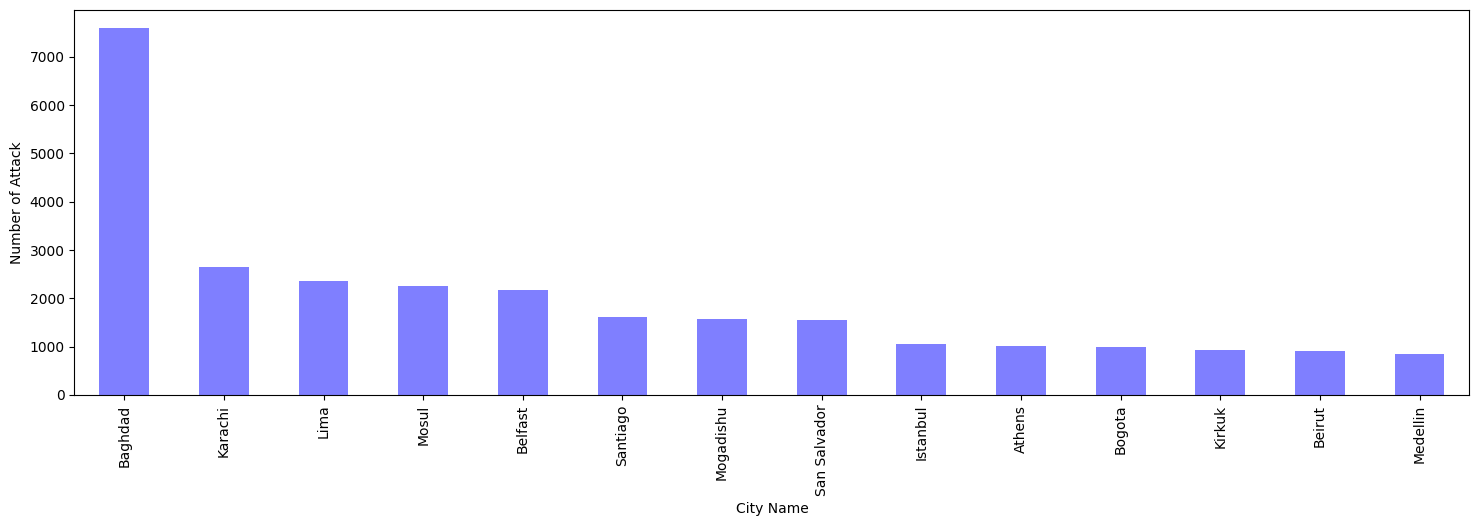

In [20]:
# Number of attacked in top 15 cities
ds['City'].value_counts()[:15].drop('Unknown').plot(kind='bar', figsize=(18,5),color='blue',alpha=0.5)
plt.xlabel('City Name')
plt.ylabel('Number of Attack')
plt.show()

In [21]:
ds['City'].value_counts()[:10].drop('Unknown')

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64

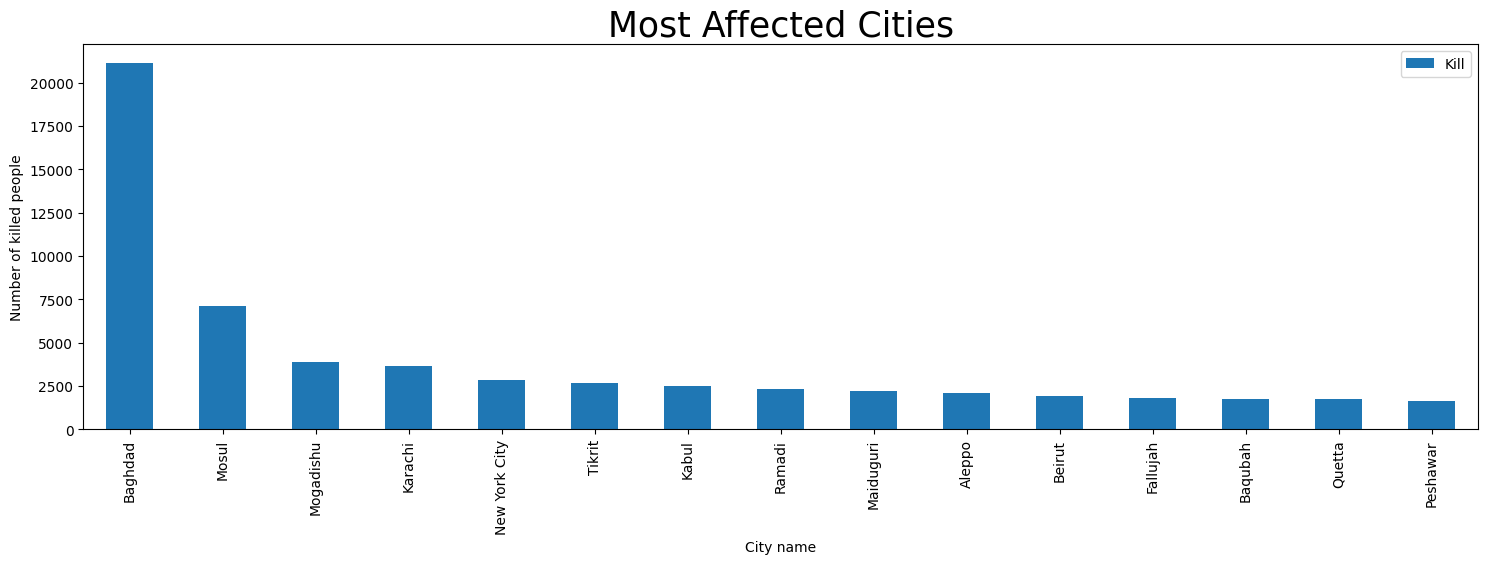

In [22]:
# Most Kill in City

ds[['City','Kill']].groupby(['City']).sum().drop('Unknown').sort_values('Kill',ascending=False).head(15).plot(kind='bar',figsize=(18,5))
plt.xlabel('City name')
plt.ylabel('Number of killed people')
plt.title('Most Affected Cities', fontsize=25)
plt.show()

In [23]:
# Top 10 Terrorist Groups

ds['Group'].value_counts()[1:11]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group, dtype: int64

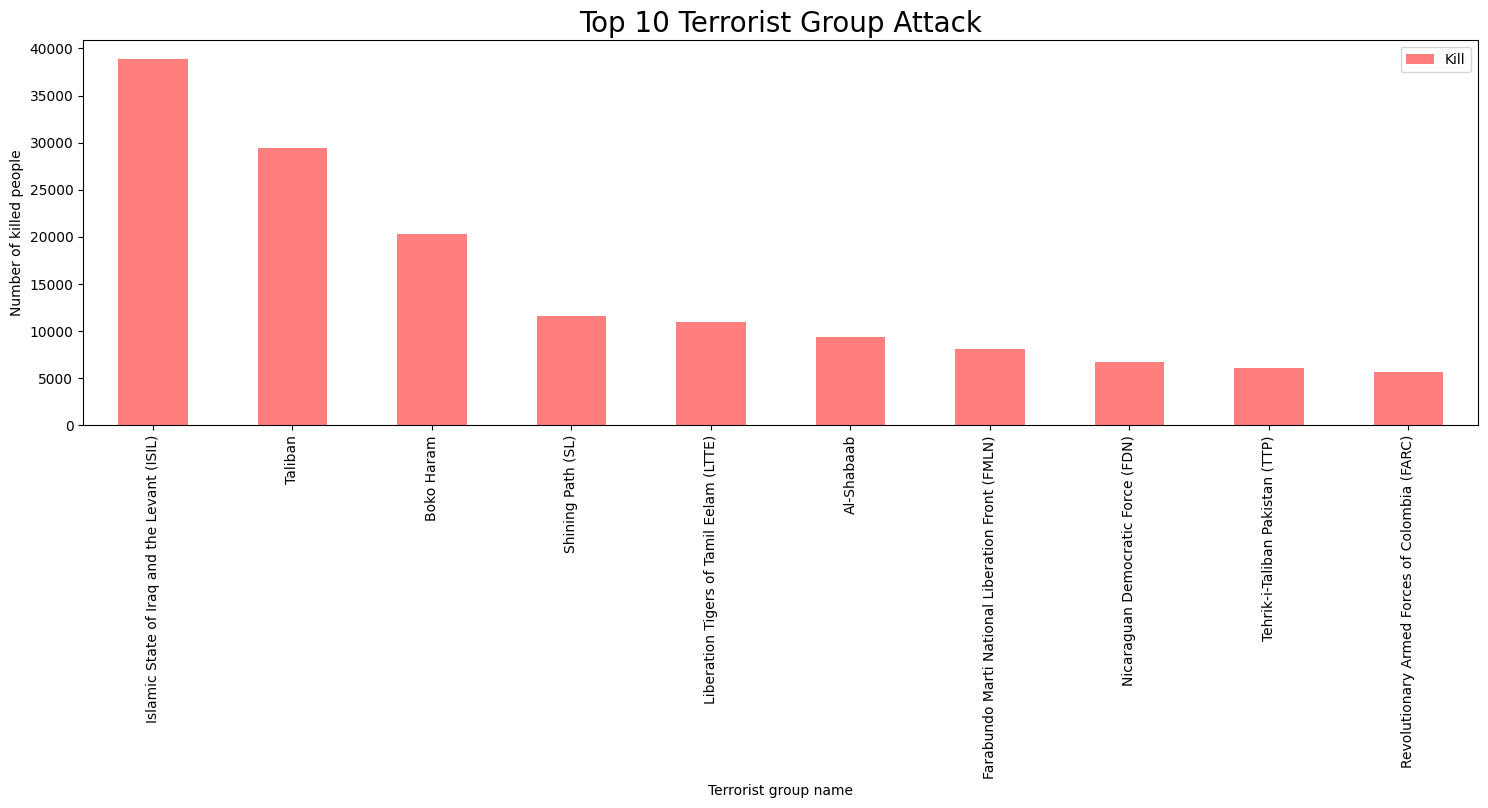

In [24]:
# Most Kills by Terrorist Group

ds[['Group','Kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('Kill',ascending=False).head(10).plot(kind='bar',alpha=0.5,color='red',figsize=(18,5))
plt.title("Top 10 Terrorist Group Attack",fontsize=20)
plt.xlabel("Terrorist group name",fontsize=10)
plt.ylabel("Number of killed people",fontsize=10)
plt.show()

In [25]:
df=ds[['Group','Country','Kill']]
df=df.groupby(['Group','Country']).sum().sort_values('Kill',ascending=False).drop('Unknown').head(10)
df

<ipython-input-25-b2cce5a3879f>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.groupby(['Group','Country']).sum().sort_values('Kill',ascending=False).drop('Unknown').head(10)


,,Kill
Group,Country,
Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
Taliban,Afghanistan,29269.0
Boko Haram,Nigeria,16917.0
Shining Path (SL),Peru,11595.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
Al-Shabaab,Somalia,8176.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
Nicaraguan Democratic Force (FDN),Nicaragua,6630.0


In [26]:
# Types of Attack

ds['AttackType'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

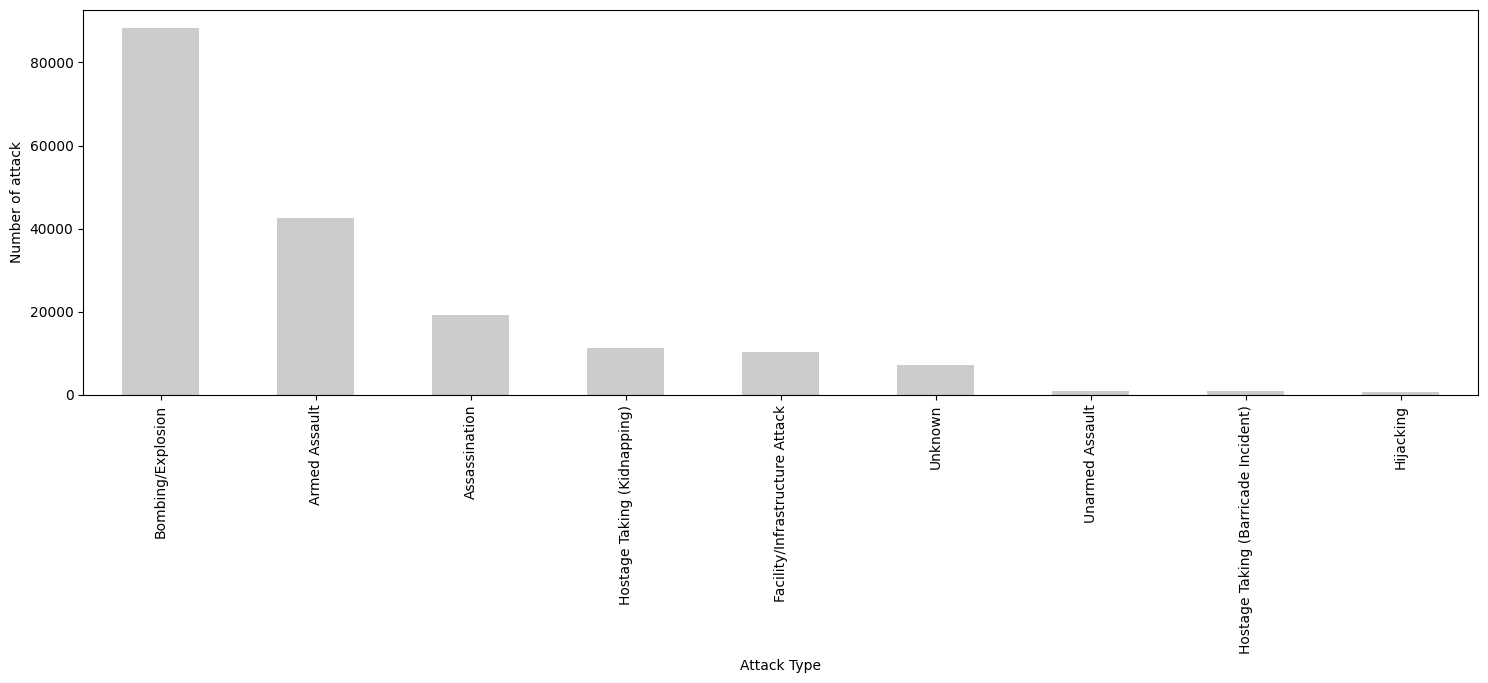

In [27]:
ds['AttackType'].value_counts().plot(kind='bar',figsize=(18,5),color='grey',alpha=0.4)
plt.xlabel("Attack Type",fontsize=10)
plt.ylabel("Number of attack",fontsize=10)
plt.show()

In [28]:
attack =ds['AttackType'].apply(lambda x: x if x in ['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking (Kidnapping)','Facility/Infrastructure Attack'] else 'Others')
attack_type = attack.value_counts().tolist()

In [29]:
attack.value_counts()

Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
Others                             9941
Name: AttackType, dtype: int64

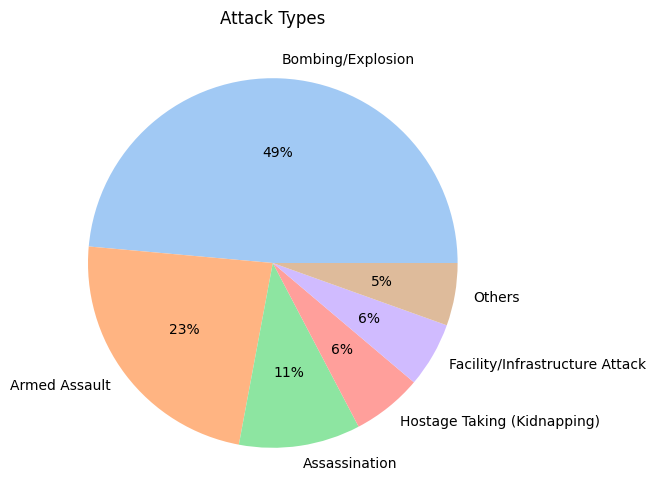

In [30]:
labels = ['Bombing/Explosion','Armed Assault','Assassination',
          'Hostage Taking (Kidnapping)','Facility/Infrastructure Attack','Others']
colors = sns.color_palette('pastel')[0:6]

#create pie chart
plt.figure(figsize=(15, 6))
plt.title('Attack Types')
plt.pie(attack_type, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [31]:
# killed people on attacks
ds.pivot_table(columns='AttackType', values='Kill', aggfunc='sum')

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [32]:
# Types of Weapon use by Terrorists

ds['WeaponType'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [33]:
weaptype =ds['WeaponType'].apply(lambda x: x if x in ['Explosives','Firearms','Unknown','Incendiary','Melee'] else 'Others')
weapontype = weaptype.value_counts().tolist()


In [34]:
weaptype.value_counts()

Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Others          794
Name: WeaponType, dtype: int64

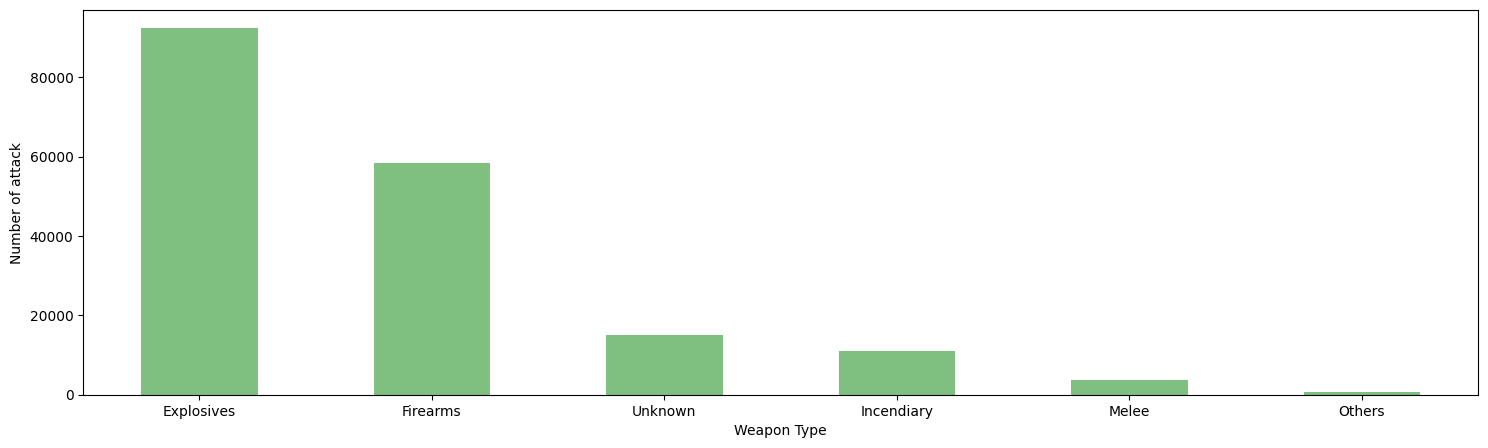

In [35]:
weaptype.value_counts().plot(kind='bar',figsize=(18,5),color='green',alpha=0.5)
plt.xlabel("Weapon Type",fontsize=10)
plt.ylabel("Number of attack",fontsize=10)
plt.xticks(rotation = 00)
plt.show()

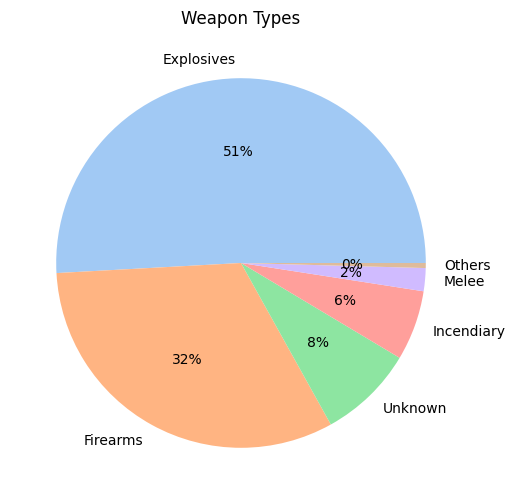

In [36]:
weap_labels = ['Explosives','Firearms','Unknown','Incendiary','Melee','Others']
colors = sns.color_palette('pastel')[0:6]

#create pie chart
plt.figure(figsize=(15,6))
plt.title('Weapon Types')
plt.pie(weapontype, labels = weap_labels, colors = colors, autopct='%.0f%%')
plt.show()

In [37]:
ds['TargetType'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: TargetType, dtype: int64

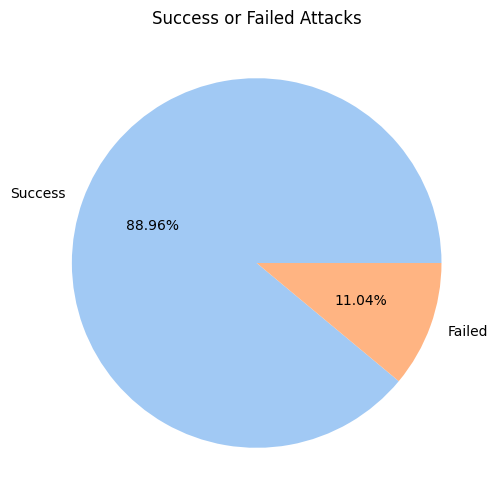

In [38]:
ratio = ds['Success'].apply(lambda x: x if x == 1 else 0).value_counts().tolist()
weap_labels = ['Success','Failed']
colors = sns.color_palette('pastel')[0:6]

#create pie chart
plt.figure(figsize=(15,6))
plt.title('Success or Failed Attacks')
plt.pie(ratio, labels = weap_labels, colors = colors, autopct='%.2f%%')
plt.show()

#Conclusion
* More than **16000** attacks done in **2014**. It is most attacked year.
* Iraq, Pakistan, Afghanistan, India and Colombia, these are top 5 with most Terrorist attack done.
* Most affected city is **Baghdad** with 7500+ attacks.
* 7478 attacks done by Taliban group till 2017.
* Top most killed by Islamic State of Iraq and the Levant (ISIL) terrorist group.
* Terrorist groups mostly use Bombing/Explosion for attack.
* Terrorist killed people mainly with Armed Assault and Bombing/Explosion.
* Terrorist mostly uses Explosives as a weapon.




